In [30]:
import os
if not 'src' in os.listdir():
    base_dir_notebook = os.path.abspath(".")
    os.chdir("../..")
import optuna
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice
from src.visualization.visualize import TrainValidationLossVisualization, Visualization
from src.visualization.utils import FAU_GREY, FAU_BLUE

experiment_names = ["experiment_1_delay_length", "experiment_2_frequency", "experiment_3_sequence_length"]
exp_names_for_viz = ["Experiment 1", "Experiment 2", "Experiment 3"]
storages = [f"sqlite:///models/{exp_name}/transformer/optuna_study/{exp_name}.db" for exp_name in experiment_names]

palette = [(0.01568627450980392, 0.11764705882352941, 0.25882352941176473), (0.629434832756632, 0.6678200692041523, 0.729688581314879), (0.876478277585544, 0.889273356401384, 0.9069896193771626)]

studies = [optuna.load_study(study_name=exp_name, storage=storage) for exp_name, storage in zip(experiment_names, storages)]
runs = []

for i in range(3):
    for trial in studies[i].trials:
        params = trial.params
        run = [exp_names_for_viz[i], trial.value, params["N"], params["d_ff"], 2**params["log_d_model"], 2**params["log_h"]]
        runs.append(run)
    #plot_slice(studies[i], params=["d_ff", "log_h", "log_d_model", "N"]).show()

df = pd.DataFrame(runs, columns=["i", "value", "N", "dff", "d_model", "h"])

## Analyze Experiments jointly

As hypothesized not as important
Two optimizations finished in low values, one in high --> range does not have to be as high for ts forecasting
good because huge influence on #parameters

## Compare with dff
all over the place
higher not necessarily better
low also had good results

## Compare with h
all the highest h, --> high is good,
case for multi head attention
bad for memory complexity


## Compare with N
All of them tended towards higher values (higher = significantly more params)
none of them towards the highest, only last one had highest value at N=5 so maybe this


## Compare with d model
Higher better, difference between 32 and 64 not as significant

# Perform analysis of best models with normalization

2021-11-10 22:59:37 Mischa-PC src.visualization[16516] INFO using latex font


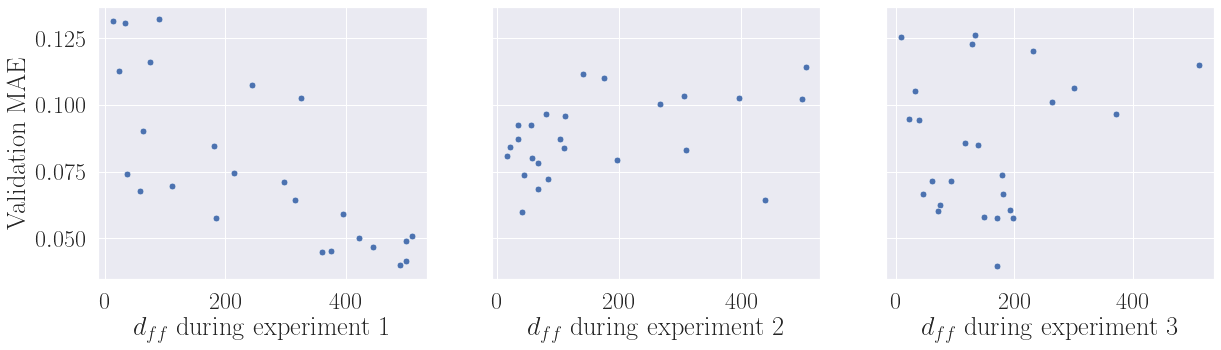

In [31]:
compare_with = "dff"

viz = Visualization(use_latex_font=True, font_scale=2.2)
fig = plt.figure(figsize=(20, 5))
gs = fig.add_gridspec(1, 3, hspace=0)
axs = gs.subplots(sharex='col', sharey='row')

for i, ax in enumerate(axs):
    sns.scatterplot(ax=ax, x=compare_with, y="value", data=df[df["i"] == exp_names_for_viz[i]], palette=palette[i], s=45)
    ax.set_xlabel("$d_{ff}$ during " + exp_names_for_viz[i].lower())
    if i == 0:
        ax.set_ylabel("Validation MAE")
    else:
        ax.set_ylabel("")
plt.ylabel("Validation MAE")
plt.savefig(base_dir_notebook + "/figures/optuna_compare_with_dff.pdf", bbox_inches="tight")

## Better Boxplot

In [32]:
def better_box_plot(x, xlabel, savepath):
    viz = Visualization(use_latex_font=True, font_scale=2.2)
    fig = plt.figure(figsize=(20, 5))
    gs = fig.add_gridspec(1, 3, hspace=0)
    axs = gs.subplots(sharex='col', sharey='row')

    for i, ax in enumerate(axs):
        sns.boxplot(ax=ax, x=x, y="value", data=df[df["i"] == exp_names_for_viz[i]], color= 'w')
        sns.swarmplot(ax=ax, x=x, y="value", data=df[df["i"] == exp_names_for_viz[i]], color='black')
        ax.set_xlabel(xlabel + " during " + exp_names_for_viz[i].lower())
        if i == 0:
            ax.set_ylabel("Validation MAE")
        else:
            ax.set_ylabel("")

    plt.savefig(base_dir_notebook + savepath, bbox_inches="tight")

2021-11-10 22:59:38 Mischa-PC src.visualization[16516] INFO using latex font


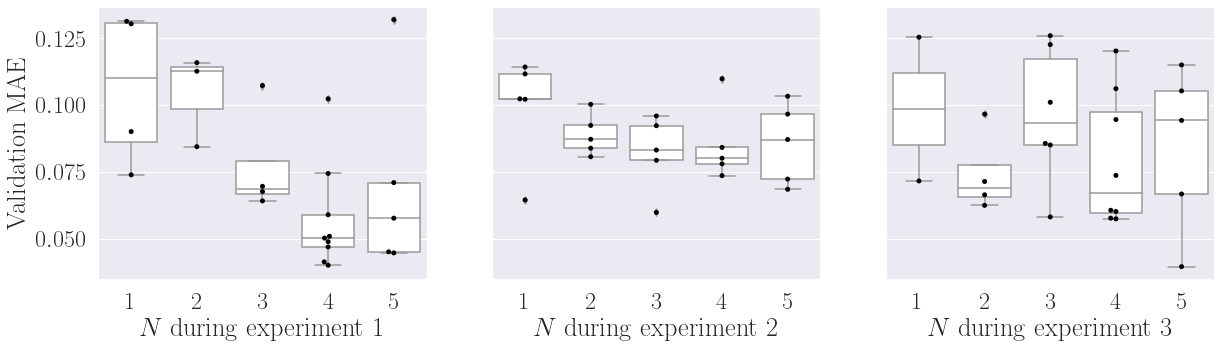

In [33]:
better_box_plot(x="N", xlabel="$N$ ", savepath="/figures/optuna_compare_N_better.pdf")

2021-11-10 22:59:39 Mischa-PC src.visualization[16516] INFO using latex font


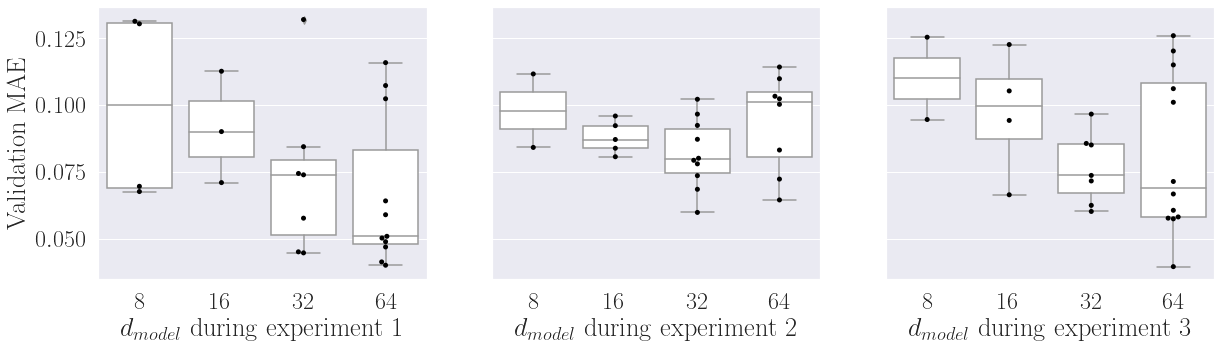

In [34]:
better_box_plot(x="d_model", xlabel="$d_{model}$ ", savepath="/figures/optuna_compare_dmodel_better.pdf")

2021-11-10 22:59:40 Mischa-PC src.visualization[16516] INFO using latex font


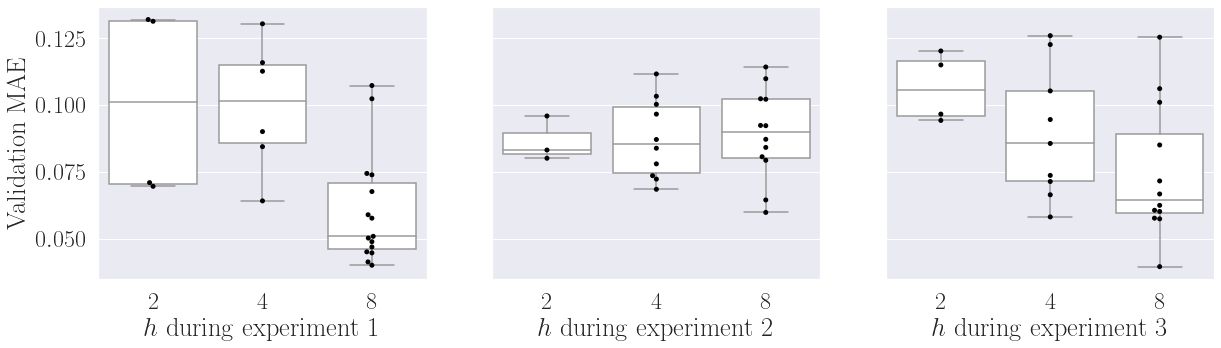

In [35]:
better_box_plot(x="h", xlabel="$h$ ", savepath="/figures/optuna_compare_h_better.pdf")
